## Importing Necessary Libraries

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[15,8]
import seaborn as sns
sns.set_style("whitegrid")
import datetime as dt

In [226]:
#!pip install openpyxl

In [227]:
data=pd.read_excel("1673872777_ausapparalsales4thqrt2020.xlsx")

In [228]:
data.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [229]:
data.shape

(7560, 6)

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [231]:
data.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

## 1)	Determine the states that are generating the highest revenues 

In [232]:
data['Revenue']=data['Unit']*data['Sales']

In [233]:
state_groupby=data.groupby('State', sort=True)['Revenue'].sum().reset_index()

In [234]:
state_groupby.sort_values('Revenue', ascending=False)

,State,Revenue
5,VIC,4433275000
0,NSW,2265295000
3,SA,1414627500
2,QLD,490462500
4,TAS,227010000
1,NT,223500000
6,WA,218537500


## ●●	Perform descriptive statistical analysis on the data (Sales and Unit columns) 

In [235]:
data.describe()

,Unit,Sales,Revenue
count,7560.000000,7560.000000,7.560000e+03
mean,18.005423,45013.558201,1.226549e+06
std,12.901403,32253.506944,1.690744e+06
min,2.000000,5000.000000,1.000000e+04
25%,8.000000,20000.000000,1.600000e+05
50%,14.000000,35000.000000,4.900000e+05
75%,26.000000,65000.000000,1.690000e+06
max,65.000000,162500.000000,1.056250e+07


In [236]:
data.describe(include=['int'])

,Unit,Sales,Revenue
count,7560.000000,7560.000000,7.560000e+03
mean,18.005423,45013.558201,1.226549e+06
std,12.901403,32253.506944,1.690744e+06
min,2.000000,5000.000000,1.000000e+04
25%,8.000000,20000.000000,1.600000e+05
50%,14.000000,35000.000000,4.900000e+05
75%,26.000000,65000.000000,1.690000e+06
max,65.000000,162500.000000,1.056250e+07


## ●	Determine which group is generating the highest sales, and which group is generating the lowest sales.

In [237]:
grp_sales=data.groupby('Group')['Sales'].sum().reset_index()

In [238]:
grp_sales.sort_values('Sales', ascending=False)

,Group,Sales
1,Men,85750000
3,Women,85442500
0,Kids,85072500
2,Seniors,84037500


## ●	Determine which state is generating the highest sales, and which state is generating the lowest sales.

In [239]:
state_sales=data.groupby('State')['Sales'].sum().reset_index()

In [240]:
state_sales.sort_values('Sales', ascending=False)

,State,Sales
5,VIC,105565000
0,NSW,74970000
3,SA,58857500
2,QLD,33417500
4,TAS,22760000
1,NT,22580000
6,WA,22152500


In [241]:
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month
data['week']=data['Date'].dt.isocalendar().week
data['Quarter']=data['Date'].dt.quarter
data['month_name']=data['Date'].dt.month_name()
data['day'] = data['Date'].dt.day

In [242]:
data.tail()

,Date,Time,State,Group,Unit,Sales,Revenue,year,month,week,Quarter,month_name,day
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,490000,2020,12,53,4,December,30
7556,2020-12-30,Evening,TAS,Kids,15,37500,562500,2020,12,53,4,December,30
7557,2020-12-30,Evening,TAS,Men,15,37500,562500,2020,12,53,4,December,30
7558,2020-12-30,Evening,TAS,Women,11,27500,302500,2020,12,53,4,December,30
7559,2020-12-30,Evening,TAS,Seniors,13,32500,422500,2020,12,53,4,December,30


In [243]:
weekly_sales = data.groupby('week')['Sales'].mean().reset_index().sort_values('week')

In [244]:
weekly_sales

,week,Sales
0,40,44776.785714
1,41,45922.619048
2,42,45306.122449
3,43,45603.741497
4,44,43268.849206
5,45,35484.693878
6,46,36007.653061
7,47,35905.612245
8,48,36526.360544
9,49,50378.401361


<AxesSubplot:xlabel='week'>

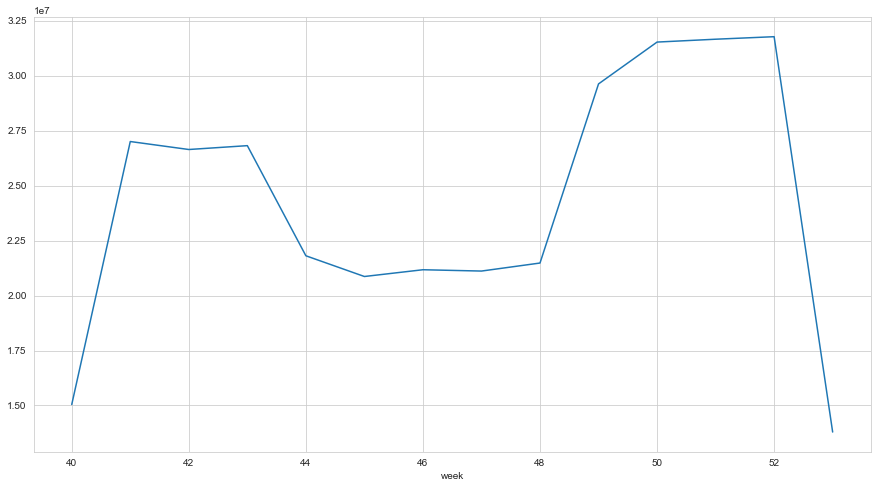

In [245]:
data.groupby('week')['Sales'].sum().plot()

In [246]:
monthly_sales = data.groupby('month')['Sales'].sum().reset_index().sort_values('month')

In [247]:
monthly_sales

,month,Sales
0,10,114290000
1,11,90682500
2,12,135330000


<AxesSubplot:xlabel='month'>

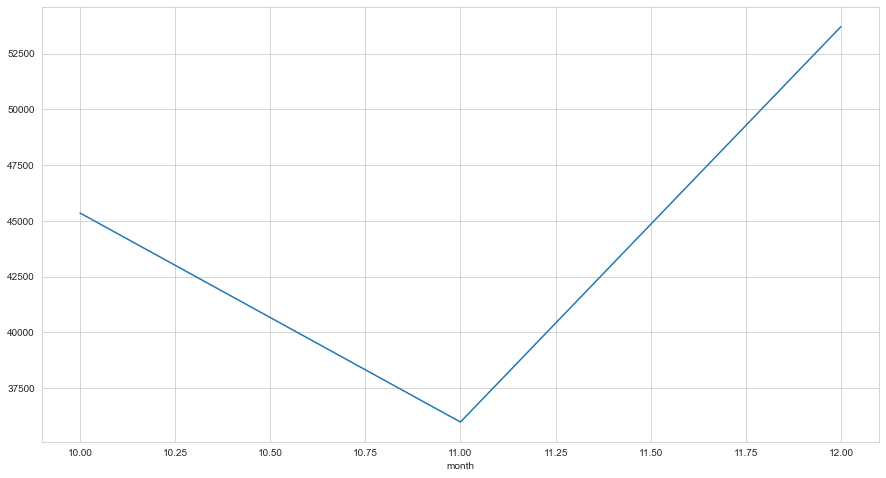

In [248]:
data.groupby('month')['Sales'].mean().plot()

## 3.	Data Visualization

<AxesSubplot:title={'center':'State-wise sales analysis'}, xlabel='Sales', ylabel='Group'>

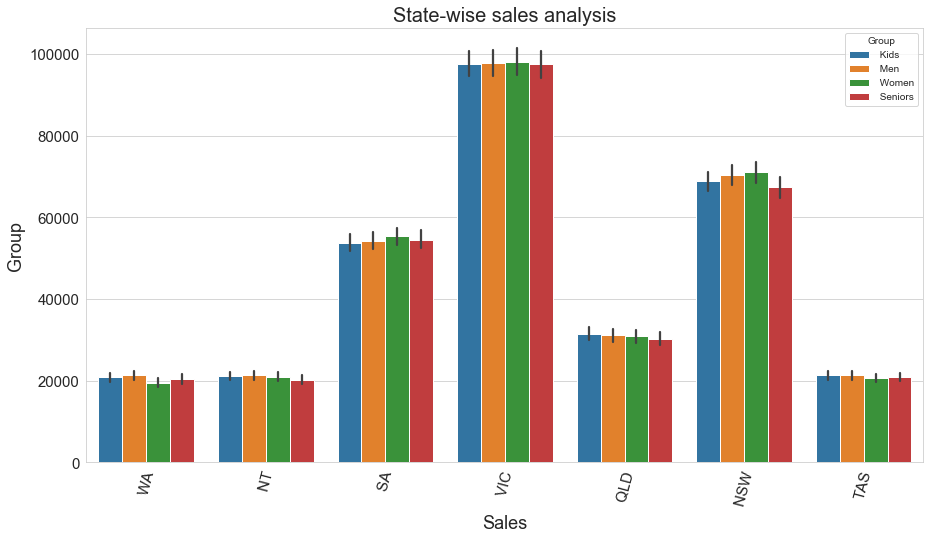

In [249]:
plt.xticks(rotation=75, fontsize=15)
plt.ylabel('Group', fontsize=18)
plt.yticks(fontsize=15)
plt.xlabel('Sales', fontsize=18)
plt.title('State-wise sales analysis', fontsize=20)
sns.barplot(data=data, y='Sales', x='State', hue='Group')

<AxesSubplot:title={'center':'Group-wise sales analysis'}, xlabel='State', ylabel='Sales'>

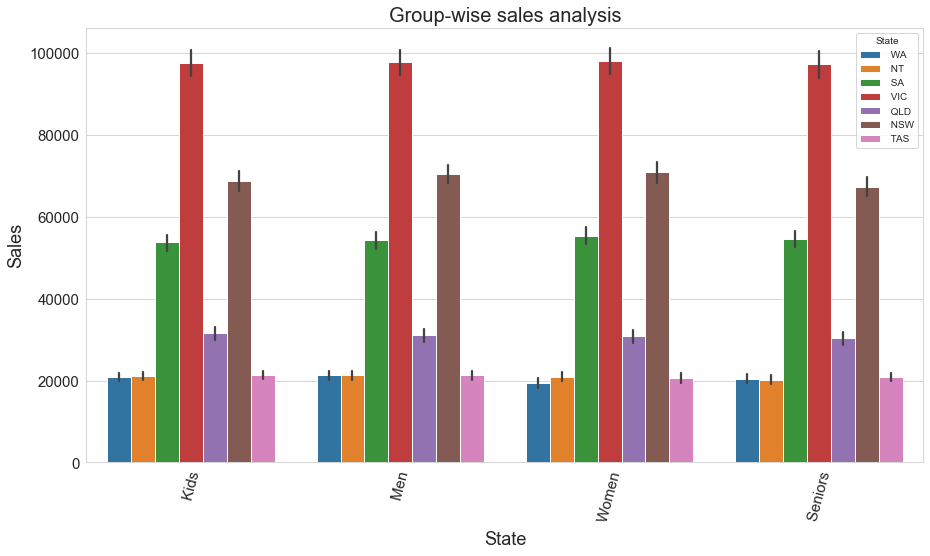

In [250]:
plt.xticks(rotation=75, fontsize=15)
plt.ylabel('Sales', fontsize=18)
plt.yticks(fontsize=15)
plt.xlabel('State', fontsize=18)
plt.title('Group-wise sales analysis', fontsize=20)
sns.barplot(data=data, y='Sales', hue='State', x='Group')

<AxesSubplot:title={'center':'State-wise monthly sales analysis'}, xlabel='State', ylabel='Sales'>

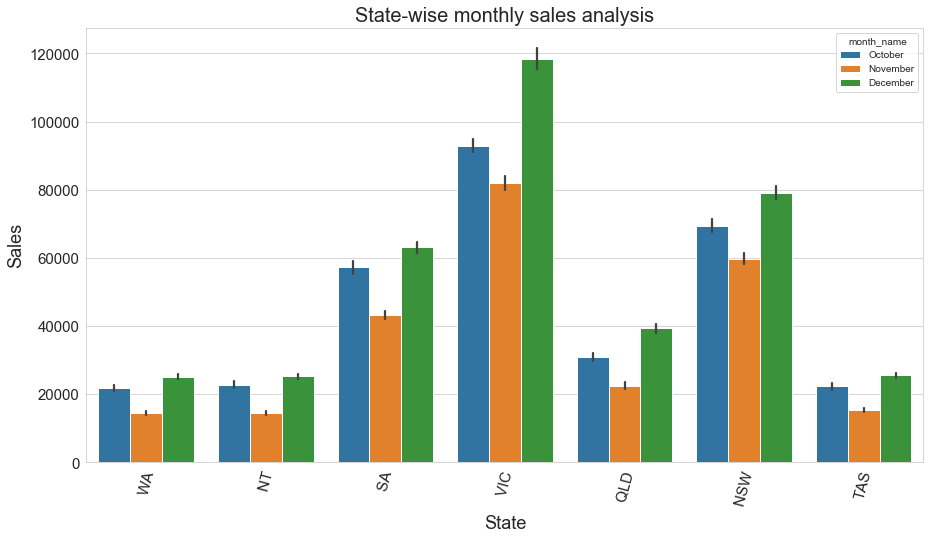

In [251]:
plt.xticks(rotation=75, fontsize=15)
plt.ylabel('Sales', fontsize=18)
plt.yticks(fontsize=15)
plt.xlabel('State', fontsize=18)
plt.title('State-wise monthly sales analysis', fontsize=20)
sns.barplot(data=data, y='Sales', hue='month_name', x='State')

<AxesSubplot:title={'center':'Group-wise monthly sales analysis'}, xlabel='State', ylabel='Sales'>

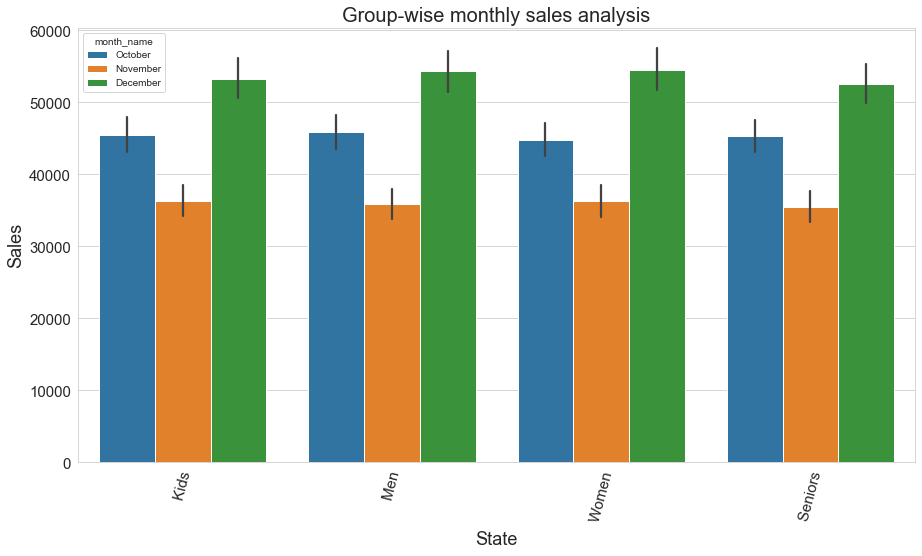

In [252]:
plt.xticks(rotation=75, fontsize=15)
plt.ylabel('Sales', fontsize=18)
plt.yticks(fontsize=15)
plt.xlabel('State', fontsize=18)
plt.title('Group-wise monthly sales analysis', fontsize=20)
sns.barplot(data=data, y='Sales', hue='month_name', x='Group')

In [253]:
state_grp_sales = data.groupby(['month','State','Group'])['Sales'].sum()

<AxesSubplot:xlabel='month,State,Group'>

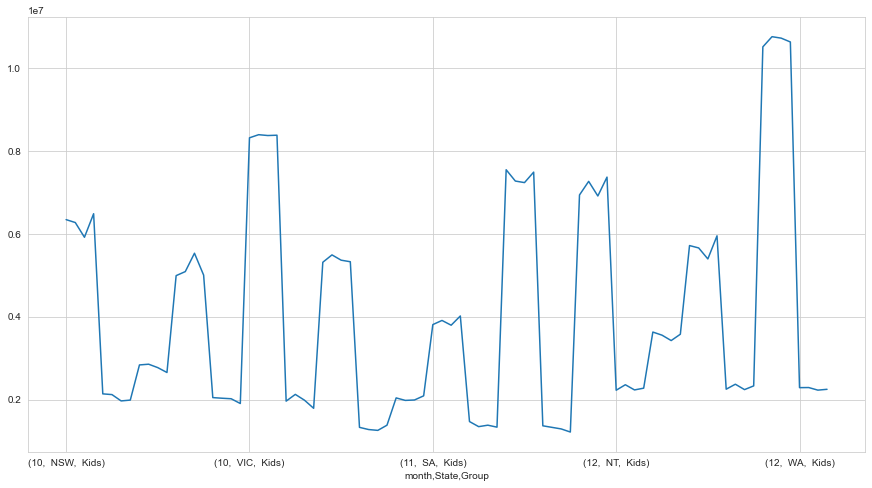

In [254]:
state_grp_sales.plot()

## ○	Time-of-the-day analysis

In [255]:
time_grp = data.groupby('Time')['Sales'].mean().reset_index()

In [256]:
time_grp.sort_values('Sales', ascending=False)

,Time,Sales
2,Morning,45320.436508
0,Afternoon,45241.071429
1,Evening,44479.166667


<AxesSubplot:xlabel='Time', ylabel='Sales'>

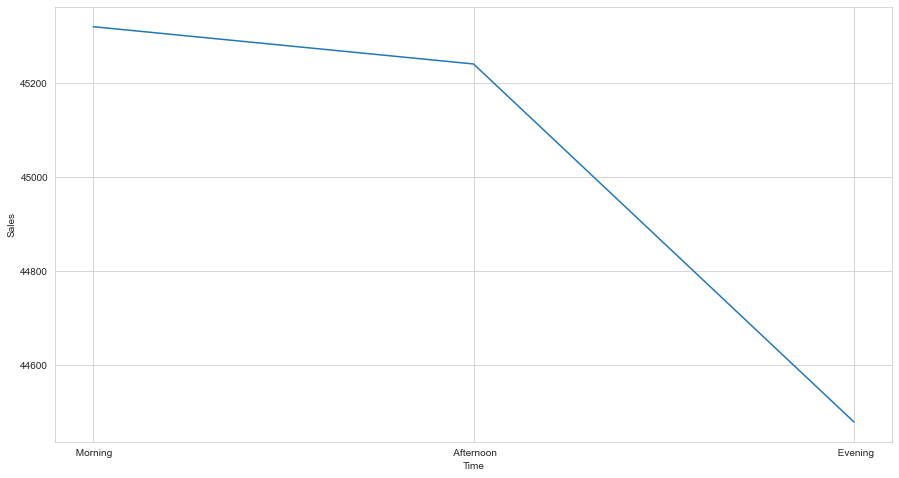

In [257]:
sns.lineplot(data = time_grp.sort_values('Sales', ascending=False), x='Time', y='Sales')

In [258]:
daily_sales_chart = data.groupby(['day','State','Group'])['Sales'].sum().reset_index()

In [259]:
weekly_sales_chart = data.groupby(['week','State','Group'])['Sales'].sum().reset_index()

In [260]:
monthly_sales_chart = data.groupby(['month','State','Group'])['Sales'].sum().reset_index()

<AxesSubplot:title={'center':'Trend chart for daily sales analysis'}, xlabel='Days', ylabel='Sales'>

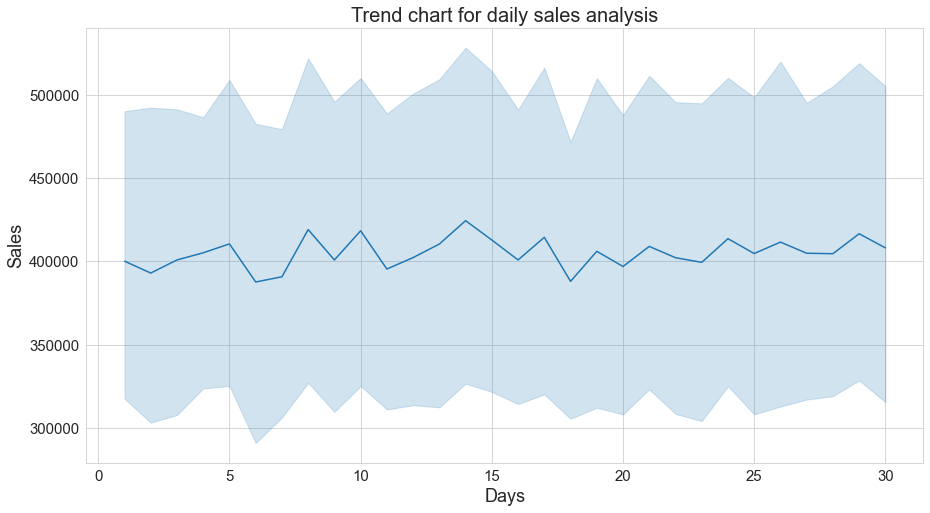

In [261]:
plt.xticks(fontsize=15)
plt.ylabel('Sales', fontsize=18)
plt.yticks(fontsize=15)
plt.xlabel('Days', fontsize=18)
plt.title('Trend chart for daily sales analysis', fontsize=20)
sns.lineplot(daily_sales_chart,x='day', y='Sales')

<AxesSubplot:title={'center':'Trend chart for weekly sales analysis'}, xlabel='week', ylabel='Sales'>

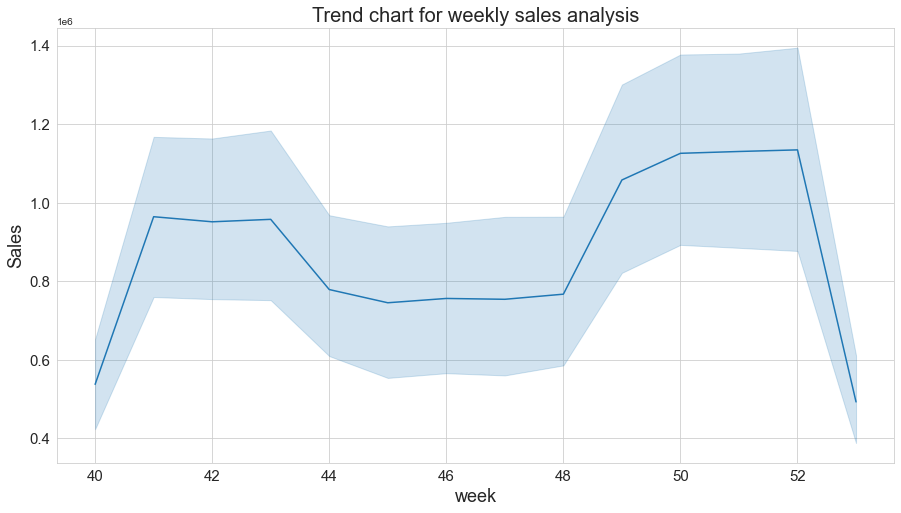

In [262]:
plt.xticks(fontsize=15)
plt.ylabel('Sales', fontsize=18)
plt.yticks(fontsize=15)
plt.xlabel('week', fontsize=18)
plt.title('Trend chart for weekly sales analysis', fontsize=20)
sns.lineplot(weekly_sales_chart, x='week', y='Sales')

<AxesSubplot:title={'center':'Trend chart for monthly sales analysis'}, xlabel='month', ylabel='Sales'>

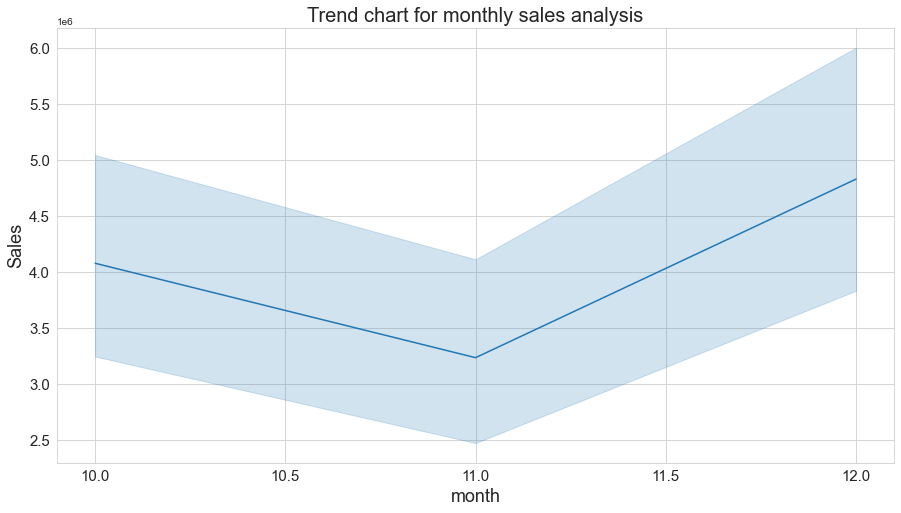

In [263]:
plt.xticks(np.linspace(10, 12, 5), fontsize=15)
plt.ylabel('Sales', fontsize=18)
plt.yticks(fontsize=15)
plt.xlabel('month', fontsize=18)
plt.title('Trend chart for monthly sales analysis', fontsize=20)
sns.lineplot(monthly_sales_chart, x='month', y='Sales')

<AxesSubplot:xlabel='week,State,Group'>

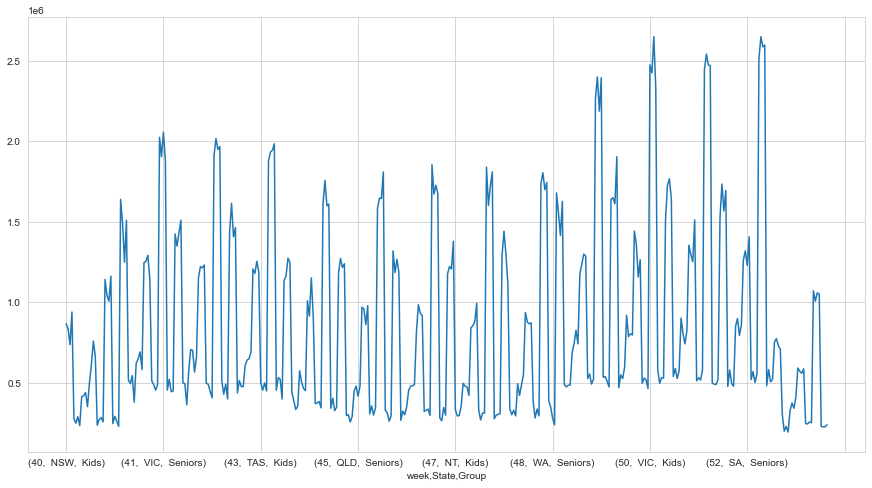

In [264]:
data.groupby(['week','State','Group'])['Sales'].sum().plot()

# Conclusions

### From above analysis we can observe during the month of December sales is going to high beacuse of year end also festival and holiday time

### state VIC has maximum sales and Men group is having more sales than ant other group

### Last 4 to 5 weeks of quarter aka 48 to 52 has we can see gradually increase in sales i.e, start of december 

### From time of the day analysis we seen morning time getting more sales than other times

In [265]:
data.to_csv('modified_sales_data.csv')